In [7]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl


In [8]:
data = pd.read_csv('https://raw.githubusercontent.com/KAIR-ISZ/public_lectures/master/Data%20Analytics%202022/Lab%205%20-%20General%20Linear%20Models/logistic_reg_data.csv', index_col=0)
data.describe()

,x1,x2,x3,x4,x5,y
count,500.000000,500.000000,500.000000,5.000000e+02,5.000000e+02,500.000000
mean,-0.015777,0.334002,-0.001484,2.022817e-01,2.770684e-03,0.494000
std,0.578292,0.301507,0.383111,2.738984e-01,3.107472e-01,0.500465
min,-0.997592,0.000005,-0.992794,2.276756e-11,-9.880191e-01,0.000000
25%,-0.515144,0.064052,-0.136718,4.102616e-03,-3.628888e-02,0.000000
50%,-0.026042,0.254724,-0.000018,6.488454e-02,-1.278838e-08,0.000000
75%,0.475396,0.555544,0.107440,3.086316e-01,2.428165e-02,1.000000
max,0.999652,0.999305,0.998957,9.986100e-01,9.982628e-01,1.000000


In [9]:
model_ppc1 = CmdStanModel(stan_file='logistic_regression_ppc.stan')


INFO:cmdstanpy:found newer exe file, not recompiling


In [10]:
R=1000
data_ppc= dict(N = data.shape[0],M = 5, X = data.iloc[:,0:5].values,sigma=10)
sim_ppc1=model_ppc1.sample(data=data_ppc, iter_sampling=R, iter_warmup=0, chains=1, refresh=R,fixed_param=True,seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


(array([[316.,  24.,  17., ...,  17.,  20., 337.],
        [385.,  18.,  10., ...,   9.,  18., 414.],
        [441.,   9.,  10., ...,   7.,   9., 406.],
        ...,
        [403.,   9.,   4., ...,   4.,  18., 445.],
        [363.,  21.,  16., ...,  13.,  12., 394.],
        [428.,  12.,  12., ...,  10.,  15., 391.]]),
 array([2.51219e-32, 1.00000e-02, 2.00000e-02, 3.00000e-02, 4.00000e-02,
        5.00000e-02, 6.00000e-02, 7.00000e-02, 8.00000e-02, 9.00000e-02,
        1.00000e-01, 1.10000e-01, 1.20000e-01, 1.30000e-01, 1.40000e-01,
        1.50000e-01, 1.60000e-01, 1.70000e-01, 1.80000e-01, 1.90000e-01,
        2.00000e-01, 2.10000e-01, 2.20000e-01, 2.30000e-01, 2.40000e-01,
        2.50000e-01, 2.60000e-01, 2.70000e-01, 2.80000e-01, 2.90000e-01,
        3.00000e-01, 3.10000e-01, 3.20000e-01, 3.30000e-01, 3.40000e-01,
        3.50000e-01, 3.60000e-01, 3.70000e-01, 3.80000e-01, 3.90000e-01,
        4.00000e-01, 4.10000e-01, 4.20000e-01, 4.30000e-01, 4.40000e-01,
        4.50000e-01, 4

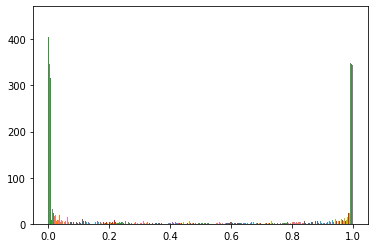

In [11]:
beta_prior = sim_ppc1.stan_variable('prob_ppc')
plt.hist(beta_prior, bins = 100)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


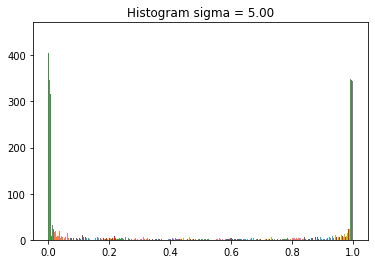

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


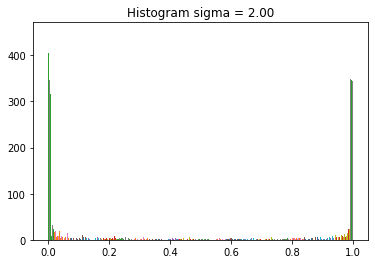

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


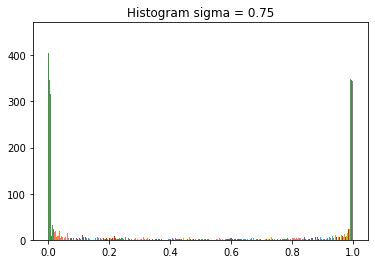

In [12]:
for sigma in [5,2,0.75]:
    R=1000
    data_ppc= dict(N = data.shape[0],M = 5,X = data.iloc[:,0:5].values,sigma=10)
    sim_ppc1=model_ppc1.sample(data=data_ppc, iter_sampling=R, iter_warmup=0, chains=1, refresh=R,fixed_param=True,seed=29042020)

    beta_prior = sim_ppc1.stan_variable('prob_ppc')
    plt.hist(beta_prior, bins = 100)
    plt.title('Histogram sigma = %1.2f' %sigma)
    plt.show()

In [13]:
model = CmdStanModel(stan_file=r'logistic_regression.stan')


INFO:cmdstanpy:compiling stan file C:\Users\macie\OneDrive\Pulpit\All\Studia\AIR_2022\Data_analytics\Data_Analytics\Data_Analytics\lab5\logistic_regression.stan to exe file C:\Users\macie\OneDrive\Pulpit\All\Studia\AIR_2022\Data_analytics\Data_Analytics\Data_Analytics\lab5\logistic_regression.exe
INFO:cmdstanpy:compiled model executable: C:\Users\macie\OneDrive\Pulpit\All\Studia\AIR_2022\Data_analytics\Data_Analytics\Data_Analytics\lab5\logistic_regression.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/macie/OneDrive/Pulpit/All/Studia/AIR_2022/Data_analytics/Data_Analytics/Data_Analytics/lab5/logistic_regression.hpp C:/Users/macie/OneDrive/Pulpit/All/Studia/AIR_2022/Data_analytics/Data_Analytics/Data_Analytics/lab5/logistic_regression.stan
Warning in 'C:/Users/macie/OneDrive/Pulpit/All/Studia/AIR_2022/Data_analytics/Data_Analytics/Data_Analytics/lab5/logistic_regression.stan', line 6, column 4: Declaration
    of arrays by placing brackets after a variable n

In [14]:
data_dict = dict(N = data.shape[0],M = 5,X = data.iloc[:,0:5].values,y = data.y.values)
fit = model.sample(data=data_dict, seed=4938483)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:01 Iteration: 1900 / 2000 [ 95%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


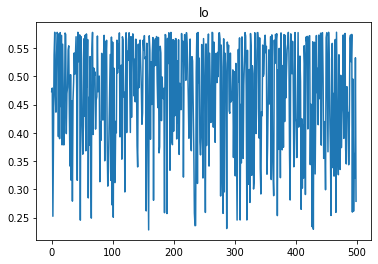

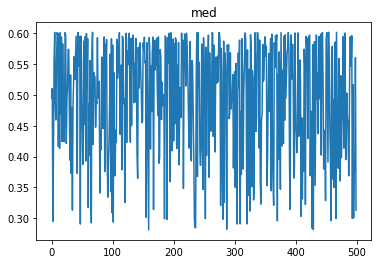

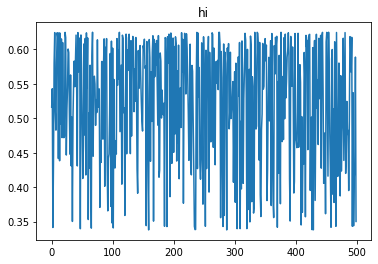

In [15]:
med_prob_ppc = np.percentile(fit.stan_variable('prob_ppc'),[25,50,75],axis=0)
estimate_ppc_df = pd.DataFrame(med_prob_ppc.T,columns = ['lo','med','hi'])

plt.plot(estimate_ppc_df['lo'])
plt.title('lo')
plt.show()

plt.plot(estimate_ppc_df['med'])
plt.title('med')
plt.show()

plt.plot(estimate_ppc_df['hi'])
plt.title('hi')
plt.show()

In [16]:
data_dict = dict(N = data.shape[0],M = 5, X = data.iloc[:,0:5].values,y = data.y.values)
fit = model.sample(data=data_dict, seed=4938483)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)



chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)

chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:01 Iteration: 1900 / 2000 [ 95%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


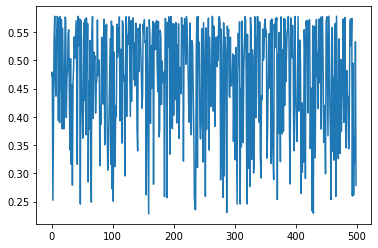

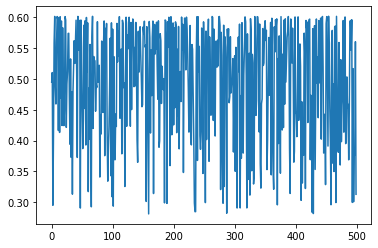

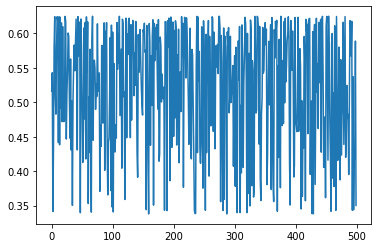

In [17]:
med_prob_ppc = np.percentile(fit.stan_variable('prob_ppc'),[25,50,75],axis=0)
estimate_ppc_df = pd.DataFrame(med_prob_ppc.T,columns = ['lo','med','hi'])
plt.plot(estimate_ppc_df['lo'])
plt.show()

plt.plot(estimate_ppc_df['med'])
plt.show()

plt.plot(estimate_ppc_df['hi'])
plt.show()

<ErrorbarContainer object of 3 artists>

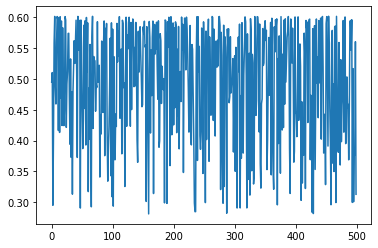

In [18]:
plt.errorbar(np.arange(500),estimate_ppc_df['med'])
